# STATS 302 Midterm Project
## Luka Mdivani, Pierre Nanquette, Teodora Petkova

We are working on the wine quality dataset found on the following link: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009<br>

The wine dataset provided data for 1599 portuguese red wines. Dataset provides 11 chemical properties , as well as quality ratings for each wine. Table of each variable and their definitions is given below.

|Variable|Definition |
|:-|:- |
|fixed acidity| most acids involved with wine or fixed or nonvolatile (do not evaporate readily)|
|volatile acidity|the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste|
|citric acid|found in small quantities, citric acid can add 'freshness' and flavor to wines|
|residual sugar|the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet|
|chlorides|the amount of salt in the wine|
|free sulfur dioxide|prevents microbial growth and the oxidation of wine|
|total sulfur dioxide| SO2 becomes evident in the nose and taste of wine|
|density|the density of water is close to that of water depending on the percent alcohol and sugar content|
|pH|most wines are between 3-4 on the pH scale|
|sulphates|a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant|
|alcohol|the percent alcohol content of the wine|
|quality|output variable (based on sensory data, score between 0 and 10)|

We solved three problems: 

1. A regression problem which tried to figure out the quality of the wine as a continuous variable based on the features at hand. <br>
2. A binary classification problem which defined wine with quality above 7 as high quality wine, and below that as low quality wine. Then, based on the data, we try to predict if wine is high quality or low quality.
3. A classification problem which tries to predict the quality of the wine out of 6 possible classes.


## Part 0: Python and Data Imports

All Python modules used throughout the notebook are loaded here. The dataset is loaded from a csv file into a Pandas Dataframe.

In [196]:
#All imports used in the notebook are in this cell:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import RandomOverSampler
from sklearn import svm
from sklearn.metrics import r2_score



In [197]:
# Data Import

# Load data in a dataframe:
df = pd.read_csv("winequality-red.csv")
y = df['quality']


## Part 1: Exploratory Analysis
To visualize the data we have, we plotted histograms of each feature and a correlation matrix of all features. After seeing some basic statistics about our dataset, we decided that we want to predict the quality of the wine based on its other features, and we dropped the 'quality' column from the DataFrame. 

In [198]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [199]:
# Drop the y-column, to seperate the data and the target variable
df.drop('quality', axis='columns', inplace=True)

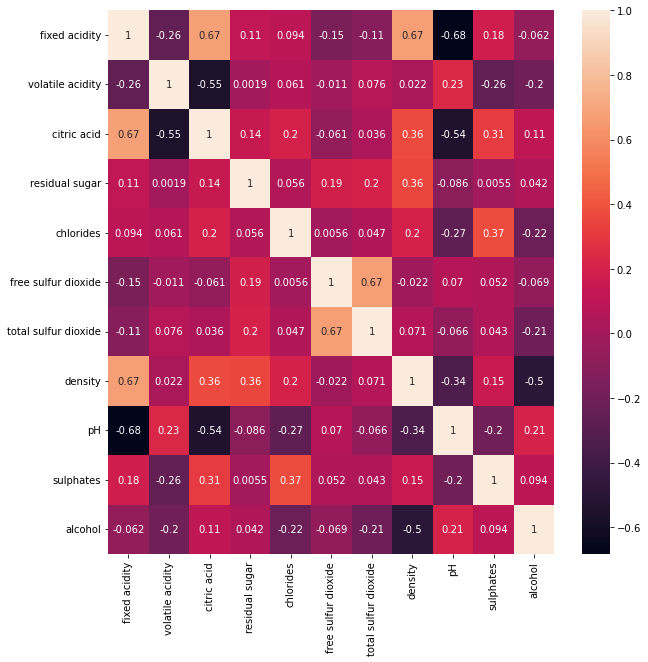

In [200]:
# draw the correlation matrix of all variables
cm=df.corr()
fig, ax = plt.subplots(figsize=(10,10))  
sn.heatmap(cm, annot=True)
plt.show()


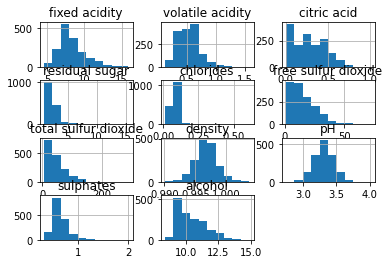

In [201]:
#Histograms of the independent variables
df.hist();


From the distribution of the predictor variables we can see that some of them are well distributed, while others are like pH and chlorides are centered around 3 and 0.1 respectively.

<AxesSubplot:>

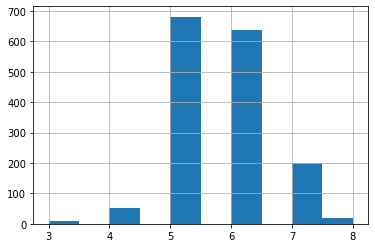

In [202]:
#Histogram of the target variable
y.hist()


The response variable is normally distributed, but we should note that the data is not balanced. There are much more wines with quality 5-6, than higher or lower quality wines.<br>

The correlation matrix above showed us some relatively high correlation between a few couples of variables, like Fixed Acidity, and Citric Acid or Density and Fixed Acidity. Before continuing our analysis, we would like to know the VIF values for every variable.

In [203]:
# VIF Analysis
data = df.to_numpy()
vif = [variance_inflation_factor(data, i) for i in range(data.shape[1])]
for i in range(11):
    print("VIF of " + df.columns[i] + ": " + str(vif[i]))

VIF of fixed acidity: 74.45226538735389
VIF of volatile acidity: 17.060026123932275
VIF of citric acid: 9.183495167192477
VIF of residual sugar: 4.662992174051856
VIF of chlorides: 6.5548772185559905
VIF of free sulfur dioxide: 6.442682022072097
VIF of total sulfur dioxide: 6.519698942374763
VIF of density: 1479.2872086341736
VIF of pH: 1070.9676853792205
VIF of sulphates: 21.5906209233164
VIF of alcohol: 124.39486649768077


### Inferences from the exploratory analysis

<p> The above exploratory analysis provided interesting insights about the data. From the correlation matrix we can see that some variables are more correlated with quality of the wine(Alcohol, Volatile Acidity, Sulphates) than others. It is also evedent that some independent variables have high correlation between themselves, so we can say that using all the variables in our models would not be needed. VIF analysis scores also confirm that filtering of the variables is necessary since collinearity scores are high. </p>



### Train-Test Split and Standardization
After splitting our data into training and testing sets, we standardize the training data because we are going to use PCA, which requires standardization for better outputs.

In [204]:
# Train-Test Split of the data
Xtrain, Xtest, ytrain, ytest = train_test_split(df,y,random_state =0)

In [205]:
#Standardization
scaler = StandardScaler()
std_Xtrain = scaler.fit_transform(Xtrain)
std_Xtest = scaler.transform(Xtest)

### PCA & Explained Variance

Text(0, 0.5, 'Cumulative Explained Variance')

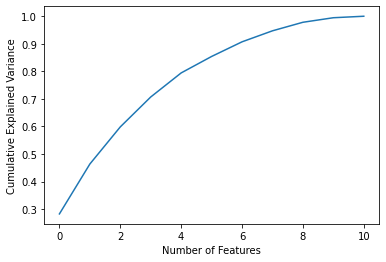

In [206]:
# PCA check on how many features explain the variance of the data
pca = PCA().fit_transform(std_Xtrain) 
explained_variance = np.var(pca, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Explained Variance')


The cumulative explained variance shows that the variance in the data is best explained by all variables. Besides, the dataset has only 10 dimensions, so we do not need to apply dimensionality reduction algorithms.

## Part 2: Models

From the available data the learning task is obvious, we need to try and predict the quality of a red wine according to some of its chemical properties.


The nature of the problem gives us room to use many different approaches.The most intuitive approach would be to use classifer models. However,since the wine quality is measured with a quantitative variable, we can apply linear regression to the prediction problem as well. 

We decided to explore 3 different approaches to deducing the quality: 
1. Multiple Linear Regression, 

2. Binary Classification with Random Forests,

3. Multiple Classification with Logistic Regression, Random Forests, and Support Vector Machines. 

The difference between the classification approaches is that for the binary approach, we split the data into two classes: good & bad quality wine, while for the other approach we use all 6 available quality levels.



## Part 3: Model Implementation

### Linear Regression
#### VIF and P-values

As mentioned in exploratory analysis, some variables seem to not contribute to the prediction. Using the correlation matrix, as well as intuitive heuristics according to definitions of each varibale and their chemical/taste properties, we decided to filter some variables out. We also ran a regression using the whole dataset to see which coefficients would have high p-values, i.e. have little effect on the model performance. 

In [207]:
df['constant'] = [1]*1599
res = sm.OLS(y, df).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Sat, 27 Nov 2021   Prob (F-statistic):          1.79e-145
Time:                        21:11:59   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity            0.0250 

From the results above, we deduced that we can remove the variables Fixed Acidity, Citric Acid, Residual Sugar, Free Sulfur Dioxide, and Density. All of them have high p-values, which shows that they are not as statistically significant as the other variables. We created a new DataFrame containing only the columns with low p-values.

In [208]:
#Remove variables according to P-values and correlation analysis
df_filtered = df.drop('free sulfur dioxide', axis='columns')
df_filtered.drop('density', axis='columns', inplace=True)
df_filtered.drop('fixed acidity', axis='columns', inplace=True)
df_filtered.drop('citric acid', axis='columns', inplace=True)
df_filtered.drop('residual sugar', axis='columns', inplace=True)


The VIF analysis on the new filtered data shows that there is no significant correlation between any of the variables. This is visualized in the correlation matrix below too.

In [209]:
# VIF analysis of the dataset without the extra columns
data = df_filtered.to_numpy()
vif = [variance_inflation_factor(data, i) for i in range(data.shape[1])]
for i in range(6):
    print("VIF of " + df_filtered.columns[i] + ": " + str(vif[i]))

VIF of volatile acidity: 1.227966801646607
VIF of chlorides: 1.3329767249777098
VIF of total sulfur dioxide: 1.053829759009383
VIF of pH: 1.2187072163627097
VIF of sulphates: 1.3212374333930237
VIF of alcohol: 1.2187325565486635


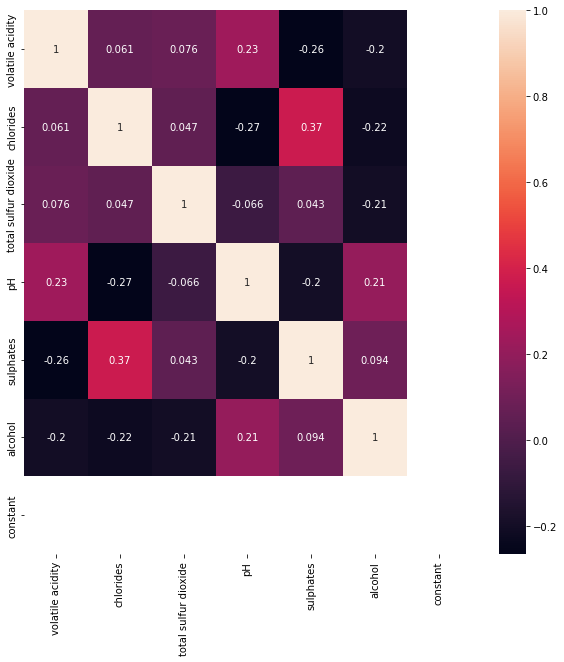

In [210]:
cm=df_filtered.corr()
fig, ax = plt.subplots(figsize=(10,10))  
sn.heatmap(cm, annot=True)
plt.show()

As we see from the new VIF values, we can keep all the remaining variables in the regression. Thus our choice to remove some variables was effective.

#### Filtered Train-Test Split and Standardization
The new train-test split is on the data without the highly correlated columns which we removed.

In [211]:
# Filtered train-test split
filtered_Xtrain, filtered_Xtest, filtered_ytrain, filtered_ytest = train_test_split(
    df_filtered, y, random_state =0
)

In [212]:
# Filtered Standardization
std_filtered_Xtrain = scaler.fit_transform(filtered_Xtrain)
std_filtered_Xtest = scaler.transform(filtered_Xtest)

#### Linear Regression Modeling

In [213]:
res = sm.OLS(filtered_ytrain, filtered_Xtrain).fit()
linpred=res.predict(filtered_Xtest)
print("Testing R^2:", r2_score(filtered_ytest, linpred))
print(res.summary())

Testing R^2: 0.3400315594249539
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     112.1
Date:                Sat, 27 Nov 2021   Prob (F-statistic):          3.33e-112
Time:                        21:11:59   Log-Likelihood:                -1188.5
No. Observations:                1199   AIC:                             2391.
Df Residuals:                    1192   BIC:                             2427.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------




### *Result Anlysis*

<p> From the above summray of the linear regression we can see that the p-value for each coefficinet is small, thus for each of them we can reject the null hypothesis and say that coefficients are signifficantly different from 0. </p>

<p> We were using 7 variables for the regression, the magnitude of respective coefficients as well as the 95% confidence interval for them is given below. </p>

|Variable| Coefficient| 95% confidence interval |
|:-| :- | :-: |
|Volatile Acidity|  -1.1704 | \[-1.394 ,-0.947 \]|
|Chlorides|  -1.9238 | \[-2.803 ,-1.044 \]|
|Total Sulfur Dioxide|  -0.0023   | \[-0.003 ,-0.001 \]|
|pH| -0.4174 | \[-0.684 , -0.151 \]|
|Sulphates| 0.8148 | \[0.575 , 1.055 \]|
|Alcohol| 0.2832 | \[0.245 ,  0.321 \]|
|Constant|4.4363| \[3.524 ,  5.348 \]|

<p> The accuracy of the model was decent but not impressive, the  values are in the table below. </p>

|Variable|${R}^{2}$ Accuracy|
|:-|:- |
|Testing Accuracy| 0.34|
|Training Accuracy| 0.36|

<p> We got a relatively low accuracy of ${R}^{2}$ = 0.34.<br>

As we metioned above, even though linear regression can be validly applied to this dataset, the integer values of the quality evaluation made it harder for a regression model to perform well. Thus the low accuracy was expected. This model wouldn't find application in the real world because of the low accuracy. Due to the discrete nature of the target variable, we expect that a classification approach to the problem might work better, which we will try next.<br>

## Binary Classification

Here we will be performing classification analysis for the dataset. We will make a new response variable which will classify every data row with >=7 quality index as High(1) quality wine, and everything else as low(0) quality. This leaves us with a binary Classification problem.

When doing the classification tasks we dropped the constant variable since it would be useless here.


In [214]:
#Drop the constant variable
df.drop('constant', axis='columns', inplace=True)
df_filtered.drop('constant', axis='columns', inplace=True)

### Train-Test Split for Classification

The target variable has to be reevaluated to fit our model, thus we reevaluate the Quality array to be split between the two classes mentioned above. Then, we resplit the data, without filtering it the way we did for the Linear Regression Model.

In [215]:
binary_y = np.zeros(len(y))
for i in range(len(y)):
    binary_y[i] = y[i]>=7.0
bcl_Xtrain, bcl_Xtest, bcl_ytrain, bcl_ytest = train_test_split(
    df, binary_y, random_state=0
)


### Random Forest
    
We chose to use Random Forest for the classification task, since it creates and evaluates several decision tree models.

#### Random Forest (Whole Dataset) 

We first use the RandomForestClassifier for the complete data with all independent variables.We thought the nature of the RandomForest approach (averaging the results of individual trees), would decrease the risk of error and improve performance.


In [235]:
tree_clf = RandomForestClassifier(n_estimators=100, random_state=0)
tree_clf.fit(bcl_Xtrain, bcl_ytrain)
ypred=tree_clf.predict(bcl_Xtest)
print(tree_clf.score(bcl_Xtest, bcl_ytest))
print(metrics.classification_report(bcl_ytest, ypred))

0.93
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       355
         1.0       0.72      0.62      0.67        45

    accuracy                           0.93       400
   macro avg       0.84      0.80      0.81       400
weighted avg       0.93      0.93      0.93       400




Already we can see a much better performance by the classifier model. The accuracy score of our model is very high *0.93*. If we take a closer look at the classification report, we can see that weighted average of the accuracy metrics is higher than the macro average. This is expected, given that there are much more wines with quality 5-6 , than with quality 7 or higher. 


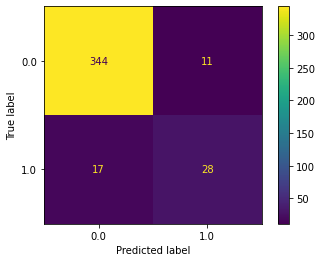

In [217]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(bcl_ytest, ypred)    

The Confusion Matrix shows that our model was significantly better at correctly identifying "bad" wines, this could again be explained by the disbalance in wine qualities.

In [218]:
importances = tree_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in tree_clf.estimators_], axis=0)
for i in range(len(std)):
    print("Feature " +
    str((i+1)) +
    " importance is:" +
    str(round(importances[i],2)) +
    " 95% confidence interval: [" +
    str(round(importances[i]-2*std[i],2)) +
    "," +
    str(round(importances[i]+2*std[i],2)) +
    "]" +
    " (" +
    df.columns[i] +
    ")"
)

Feature 1 importance is:0.07 95% confidence interval: [0.01,0.14] (fixed acidity)
Feature 2 importance is:0.12 95% confidence interval: [0.02,0.22] (volatile acidity)
Feature 3 importance is:0.09 95% confidence interval: [0.01,0.16] (citric acid)
Feature 4 importance is:0.07 95% confidence interval: [0.02,0.12] (residual sugar)
Feature 5 importance is:0.07 95% confidence interval: [0.01,0.13] (chlorides)
Feature 6 importance is:0.06 95% confidence interval: [0.01,0.1] (free sulfur dioxide)
Feature 7 importance is:0.08 95% confidence interval: [0.03,0.14] (total sulfur dioxide)
Feature 8 importance is:0.09 95% confidence interval: [0.01,0.17] (density)
Feature 9 importance is:0.06 95% confidence interval: [0.0,0.11] (pH)
Feature 10 importance is:0.12 95% confidence interval: [0.03,0.22] (sulphates)
Feature 11 importance is:0.17 95% confidence interval: [0.06,0.27] (alcohol)


The above impotance values for each features show that, only part of the variables play a significant role in the predictions. This coincides with our previous knowledge from exploratory analysis.

#### Random Forest on Filtered Data

Because we saw a disbalance in feature importances, and considering our original knowledge that some variables played little role in predictoins, we decided to run the same random forest model on the filtered dataset.

In [219]:
# New test split

bcl_filtered_Xtrain, bcl_filtered_Xtest, bcl_filtered_ytrain, bcl_filtered_ytest = train_test_split(
    df_filtered, binary_y, random_state=0
)

In [220]:
tree_clf_1 = RandomForestClassifier(n_estimators=100, random_state=0)
tree_clf_1.fit(bcl_filtered_Xtrain, bcl_filtered_ytrain)
ypred = tree_clf_1.predict(bcl_filtered_Xtest)

print(
    "The achieved accuracy is: ", 
    tree_clf_1.score(bcl_filtered_Xtest, bcl_filtered_ytest)
)

The achieved accuracy is:  0.9125


In [221]:
print(metrics.classification_report(bcl_filtered_ytest, ypred))


              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95       355
         1.0       0.62      0.56      0.59        45

    accuracy                           0.91       400
   macro avg       0.78      0.76      0.77       400
weighted avg       0.91      0.91      0.91       400



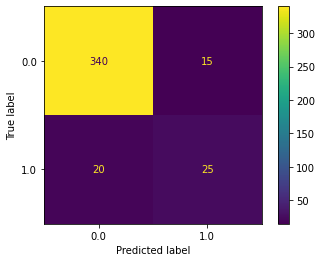

In [222]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(
    bcl_filtered_ytest, ypred
) 

In [223]:
importances_1 = tree_clf_1.feature_importances_
std_1 = np.std([tree.feature_importances_ for tree in tree_clf_1.estimators_], axis=0)

for i in range(len(std_1)):
    print("Feature " +
    str((i+1)) +
    " importance is:" +
    str(round(importances_1[i],2)) +
    " 95% confidence interval: [" +
    str(round(importances_1[i]-2*std_1[i],2)) +
    "," +
    str(round(importances_1[i]+2*std_1[i],2)) +
    "]" +
    " ("+df.columns[i] +
    ")"
)

Feature 1 importance is:0.2 95% confidence interval: [0.1,0.29] (fixed acidity)
Feature 2 importance is:0.13 95% confidence interval: [0.07,0.2] (volatile acidity)
Feature 3 importance is:0.14 95% confidence interval: [0.07,0.21] (citric acid)
Feature 4 importance is:0.12 95% confidence interval: [0.05,0.19] (residual sugar)
Feature 5 importance is:0.18 95% confidence interval: [0.11,0.26] (chlorides)
Feature 6 importance is:0.23 95% confidence interval: [0.14,0.32] (free sulfur dioxide)


As we saw from the results, using less variables slightly reduced the accuracy of the model to  *0.9125*, but that decrease is insignificant. On the other hand , the remaining 6 features have much higher and balanced importance. If we had a larger dataset using only these features, this would speed up the models much more.


Overall the both binary classification experiments produced simmilar results with high accuracy. 

|Model|Accuracy|
|:-|:- |
|**Complete Data model**| 0.93|
|**Filtered Data model**| 0.9125|

Both models can be used in practical applications and would produce good results. Hyperparameter optimization didn't show improvement in model performance, since the initial accuracy was already good, hence there was no need for further optimization.

## Nonbinary Classification
After observing that the Quality of the wine is of type integer, we decided to perform a classification task where each integer value in the Quality column is a separate class. We tried oversampling to deal with the imbalance of the data, and we used a Logistic Regressor, a Random Forest Classificator, and SVM to generate our predictions.

### Data Oversampling
The need for oversampling is discussed in the cells below.

Text(0.5, 1.0, 'Histogram of the Training Set')

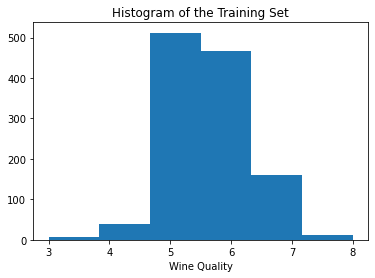

In [224]:
plt.hist(ytrain, bins=6)
plt.xlabel('Wine Quality')
plt.title('Histogram of the Training Set')

As our exploratory data analysis showed, the data is very imbalanced. This hinders classification models from taking good decisions, and poses a problem to the metrics used to evaluate the models as well. With the imbalance in the data, it is possible that all data is assigned to only one class with a fairly high accuracy. That is why we are using confusion matrices in our assessment of the model performance below.

Before considering ovarsampling, we tried to use the *class_weight = 'balanced'* parameter for our models, but the accuracy of our models diminished. We realized that working with a completely balanced dataset does not reflect the reality of our data, so we decided to use oversampling. Since the dataset is small we considered that undersampling would not work quite well. 

When using completely balanced oversampling of all classes, the accuracy of our models decreased and more points of classes 5 and 6 were mislabeled as other classes, but there was siginificant improvement in the correct identification of data from class 7.

To fix that, we tried ovarsampling in a bit more catious manner, by doubling the amount of points in classes 3, 4, 7, and 8, which have significantly less data than classes 5 and 6. The results were the same for the Logistic Regressor and the SVM, but the Random Forest Classifier performed better with this oversampling.<br>

We oversampled both the normal and the standardized data, as the Logistic Regressor needed much more iterations when running on normal data, but the accuracy of all models decreased significantly when we used standardized filtered data instead of the normal one.

Text(0.5, 1.0, 'Histogram of the Oversampled Training Set')

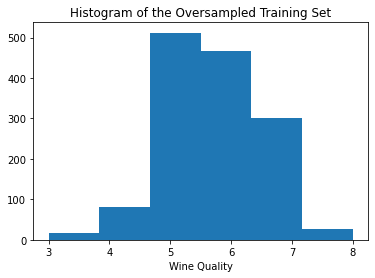

In [225]:
# Oversampling of the training data
ros = RandomOverSampler(sampling_strategy={3:16, 4:80, 7:300, 8:26})
X_train_ros, ytrain_ros = ros.fit_resample(filtered_Xtrain, ytrain)
std_X_train_ros, ytrain_ros = ros.fit_resample(std_filtered_Xtrain, ytrain)

X_train_ros, ytrain_ros = ros.fit_resample(filtered_Xtrain, ytrain)

plt.hist(ytrain_ros, bins=6)
plt.xlabel('Wine Quality')
plt.title('Histogram of the Oversampled Training Set')

The histogram of the oversampled data shows that even though the data is still very imbalanced, it is slightly better than the original one.

### Logistic Regression Classifier

C:\Users\Teodora\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy of Logistic Regressor with all nonstandardized data:  0.6225


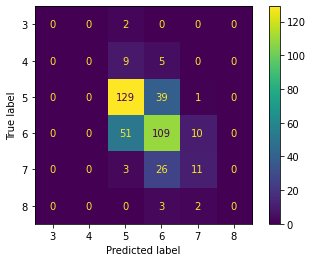

In [226]:
# Logistic Regression without oversampling on all nonstandardized data

classifier = LogisticRegression(max_iter=5000, multi_class='multinomial')
classifier.fit(Xtrain, ytrain)
predicted = classifier.predict(Xtest)
print("Accuracy of Logistic Regressor with all nonstandardized data: ", classifier.score(Xtest, ytest))
disp = metrics.ConfusionMatrixDisplay.from_predictions(ytest, predicted)  


C:\Users\Teodora\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy of Logistic Regressor with filtered nonstandardized data:  0.62


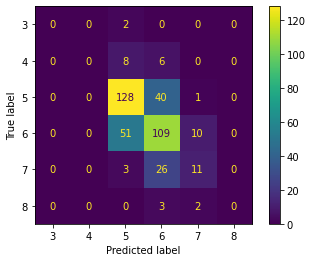

In [227]:
# Logistic Regression without oversampling on filtered nonstandardized data

classifier = LogisticRegression(max_iter=2000, multi_class='multinomial')
classifier.fit(filtered_Xtrain, ytrain)
predicted = classifier.predict(filtered_Xtest)
print("Accuracy of Logistic Regressor with filtered nonstandardized data: ", classifier.score(filtered_Xtest, ytest))
disp = metrics.ConfusionMatrixDisplay.from_predictions(ytest, predicted)  


Accuracy of Logistic Regressor on standardized and filtered data:  0.63


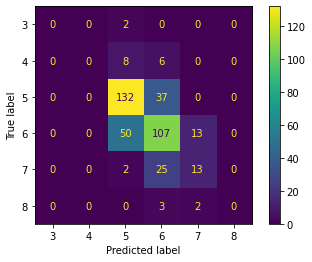

In [228]:
# Logistic Regression without oversampling on standardized and filtered data

classifier = LogisticRegression(max_iter=1000, multi_class='multinomial')
classifier.fit(std_filtered_Xtrain, ytrain)
predicted = classifier.predict(std_filtered_Xtest)
print("Accuracy of Logistic Regressor on standardized and filtered data: ", classifier.score(std_filtered_Xtest, ytest))
disp = metrics.ConfusionMatrixDisplay.from_predictions(ytest, predicted)  


Accuracy of Logistic Regressor with oversampling:  0.5875


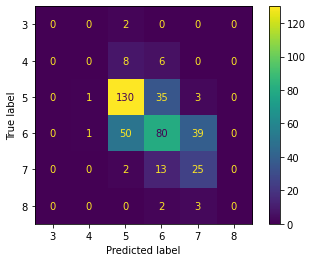

In [229]:
# Logistic regression with oversampling on filtered and standardized data
classifier = LogisticRegression(max_iter=2000, multi_class='multinomial')
classifier.fit(std_X_train_ros, ytrain_ros)
predicted = classifier.predict(std_filtered_Xtest)
print("Accuracy of Logistic Regressor with oversampling: ", classifier.score(std_filtered_Xtest, ytest))
disp = metrics.ConfusionMatrixDisplay.from_predictions(ytest, predicted)  

### Random Forest Classifier


C:\Users\Teodora\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


Accuracy of the Random Forest Classifier used on all nonstandardized data:  0.705


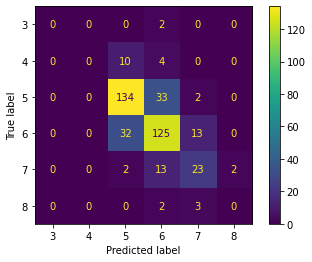

In [230]:
#Random forest classifier without oversampling
classifier = RandomForestClassifier(
    n_estimators = 1000,
    random_state = 0,
    oob_score = True
)
classifier.fit(Xtrain, ytrain)
predicted = classifier.predict(Xtest)
print("Accuracy of the Random Forest Classifier used on all nonstandardized data: ", classifier.score(Xtest, ytest))
disp = metrics.ConfusionMatrixDisplay.from_predictions(ytest, predicted)  

C:\Users\Teodora\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


Accuracy of the Random Forest Classifier used on the oversampled filtered data:  0.7025


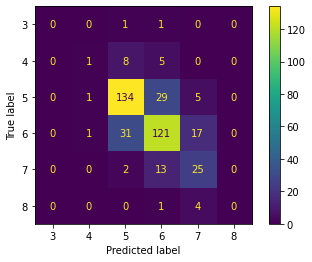

In [231]:
# Random forest classifier with oversampling
classifier.fit(X_train_ros, ytrain_ros)
predicted = classifier.predict(filtered_Xtest)
print(
    "Accuracy of the Random Forest Classifier used on the oversampled filtered data: ",
    classifier.score(filtered_Xtest, ytest)
)
disp = metrics.ConfusionMatrixDisplay.from_predictions(ytest, predicted)  

### Support Vector Machine
This is a method which we did not learn in class, but we wanted to try it as well on the classification task at hand. This method tries to find a hyperplane which separates two classes in the optimal way. There is a region around the separation hyperplane, which is maximized in a way that there will be as many points as possible on its boundary. The points located on this boundary are the support vectors, from which the name is derived.

Accuracy of the SVM on the complete nonstandardized data:  0.4975


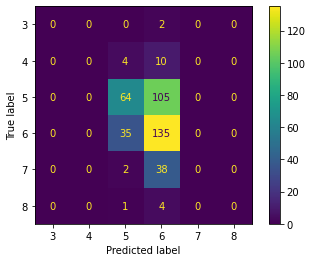

In [232]:
# SVM without oversampling
clf = svm.SVC(random_state=0)
clf.fit(Xtrain, ytrain)
predicted = clf.predict(Xtest)
print("Accuracy of the SVM on the complete nonstandardized data: ", clf.score(Xtest, ytest))
disp = metrics.ConfusionMatrixDisplay.from_predictions(ytest, predicted)  

Accuracy of the SVM on the oversampled filtered data:  0.48


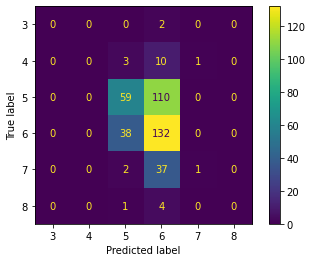

In [233]:
# SVM with oversampling
clf.fit(X_train_ros, ytrain_ros)
predicted = clf.predict(filtered_Xtest)
print("Accuracy of the SVM on the oversampled filtered data: ", clf.score(filtered_Xtest, ytest))
disp = metrics.ConfusionMatrixDisplay.from_predictions(ytest, predicted)  

### Results

We used a Logistic Regressor, a Random Forest Classifier, and a Support Vector Machine for this multiple classification task. The accuracies of the different models are described in the table below: <br>

|Model|Filtered Data|Standardized Data| Oversampled Data| Accuracy|
|:-|:- |-|-|-|
|**Logistic Regression**|no|no|no| 0.6225|
||yes|no|no|0.62|
||yes|yes|no|0.63|
||yes|yes|yes|0.59|
|**Random Forest**|no|no|no|0.705|
||yes|no|yes|0.6975|
|**Support Vector Machine**|no|no|no|0.4975|
||yes|no|yes|0.4825|

We can see that oversampling did not imiprove the accuracy for the models, but it added up to the ability of the model to predict values outside of the dominating classes. It helped all models to correctly identify a value from class 4, which is a rare class. Oversampling improved the correct identification of wines of class 7 for the Logistic Regressor, as well. 

From our results we can observe that the best model which we could employ for this dataset is the Random Forest.

## Part 4: Analysis

Our work with this dataset shows that it is most suitable for a predictive classification task. In our case, the Random Forest used for binary classification gave us the best results. <br>

Some problems we found with the data were that it was heavily imbalanced and insufficient (for an example, there were only 8 wines of quality 3). To further improve our analysis, we would need more data, in order that we can get more balanced data either naturally or through balancing techniques.<br>

Something interesting that we observed, was that the accuracy of our models changed based on the train-test splits and the devices which we used. Sometimes the differences were drastic, which we later figured out was because of the default parameters of the models we were using were different in the Python libraries versions which we used.

We think that it is a good practice for a data science team to agree on and report the specific Python libraries versions which are used for the analysis. Another good practice is to run the model many times on different devices with various train-test splits, and then accumulate the results.